In [193]:
!curl -o "results.html" "https://www.strawpoll.me/20698970/r"

!echo "score, count" > results_table.txt
!sed -n -E 's|<p class="option-text"><span>([0-9]*)[^<]*</span> <span class="option-count" data-count="([0-9]*)">[^<]*</span></p>|\1, \2|gp' 'results.html' >> results_table.txt

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28369  100 28369    0     0  77089      0 --:--:-- --:--:-- --:--:-- 77299


In [194]:
!pip3 install requests beautifulsoup4

You should consider upgrading via the '/Users/sandy/.pyenv/versions/anaconda3-5.3.1/bin/python -m pip install --upgrade pip' command.


```
<p class="option-text">
    <span>25</span>
    <span class="option-count"
        data-count="7994">7,995
    </span>
</p>
```

# Python

In [196]:
from bs4 import BeautifulSoup
import requests
import re

url = "https://www.strawpoll.me/20698970/r"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

xpath = '//*[@id="result-list"]/div/div[1]'
selpath = '#result-list > div > div:nth-child(1)'

In [197]:
rlist = soup.find("div", attrs={"class": "results"})
# for child in rlist.children:

# for item in rlist.find_all("p", attrs={"class": "option-text"}):
#     print("\nITEM:")
#     print(item)
#     for x in item.children:
#         print("CHILD: ", x)

In [198]:
results = []

data_items = rlist.find_all("p", attrs={"class": "option-text"})
for item in data_items:
    score = item.span.next
    # print("regex: ", re.search('\d*', score.string).group(0))
    score_trunc = re.search('\d*', score.string).group(0)
    tally = item.find("span", attrs={"class": "option-count"}).get("data-count")
    # print("{}, {}".format(score_trunc, tally))
    results.append((int(score_trunc), int(tally)))



In [199]:
print(data_items[0].find("span", attrs={"class": "option-count"}).get("data-count"))
print(data_items[0].next.next.next.next)

8013
<span class="option-count" data-count="8013">8013</span>


In [200]:
from operator import itemgetter
import matplotlib.pyplot as plt

results.sort(key=itemgetter(0))

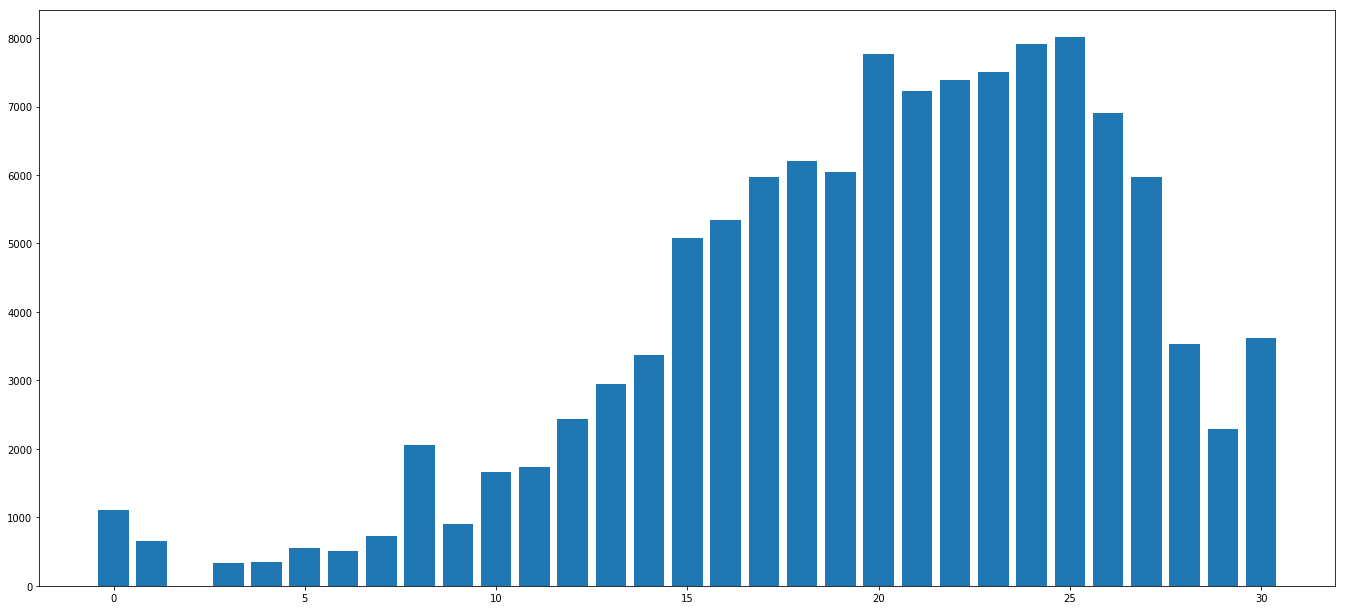

In [202]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
x_coords, y_coords = zip(*results)

ax.bar(x_coords, y_coords)
plt.show()